In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from src.models.ig import information_gain
from tools import minMaxScale


ImportError: cannot import name 'minMaxScale' from 'tools' (C:\Users\Tomas Karella\Desktop\igre\notebooks\tools.py)

In [106]:
image_path = '../data/raw/still_life/sample_22.mat'

In [111]:
from numpy import savez_compressed
import os

paintings_name = os.path.basename(os.path.dirname(image_path))
input_data = sio.loadmat(image_path)['data']
savez_compressed('some.npz')

In [123]:
import re
res = re.match('.*_([0-9]*).mat', image_path)
int(res.groups()[0])

22

In [ ]:
visible = input_data[:, :, 0:16] / 255.0
target = input_data[:, :,  26] / 255.0

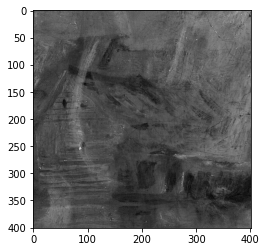

In [5]:
plt.imshow(target, cmap=plt.cm.gray)

In [6]:
ig, approx, net = information_gain(visible, target)

Selecting 25000 samples randomly for use by algorithm.
Adding input layer, width = 16
Adding dense layer, width = 25
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Adding dense layer, width = 25
Adding dense layer, width = 1
Compiling model took 0.0200's.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 31us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0049 - val_mean_squared_error: 0.0049

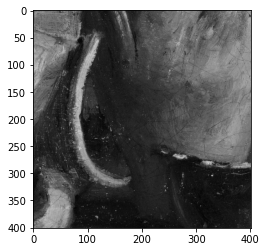

In [8]:
plt.imshow(approx, cmap=plt.cm.gray)

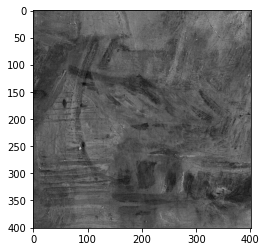

In [9]:
plt.imshow(target-np.squeeze(approx), cmap=plt.cm.gray)

In [19]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table

	return cv2.LUT(image, table)

In [15]:
diff = minMaxScale(target - np.squeeze(approx))
imgs = np.concatenate([target, np.squeeze(approx), diff], axis=1)
cv2.imshow('Target | Approx | Gamma corr', imgs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
plt.imsave('../data/raw/still_life/sample_22.png', diff, cmap='gray')

In [9]:
import scipy.io as sio
data = sio.loadmat('../../Phantom/materials-firenze.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Sep 11 13:42:28 2015',
 '__version__': '1.0',
 '__globals__': [],
 'mStats': array([[[6.84044798e-02, 6.51753607e-03],
         [4.76661059e-02, 1.00155299e-03],
         [5.99924478e-02, 1.43473566e-03],
         ...,
         [2.89930304e-01, 3.94224878e-03],
         [3.04910064e-01, 6.40098114e-03],
         [3.78293782e-01, 3.77777639e-03]],
 
        [[6.71421170e-02, 6.10994741e-03],
         [5.06336653e-02, 6.68084759e-05],
         [5.37238552e-02, 7.52129015e-05],
         ...,
         [3.62713319e-01, 9.84574307e-04],
         [4.23210508e-01, 3.42460450e-03],
         [3.50890508e-01, 9.67159566e-04]],
 
        [[5.81159877e-02, 5.67480962e-03],
         [3.44414914e-02, 4.88746493e-05],
         [3.57991138e-02, 5.11358562e-05],
         ...,
         [3.73342530e-02, 3.12925669e-04],
         [1.03645459e-01, 2.41391071e-03],
         [1.98551215e-02, 4.90054640e-05]],
 
        ...,
 
        [[3.

In [10]:
data['mStats'].shape

(240, 32, 2)

In [6]:
data['materials'][8][12]

array([6.21930874e-01, 4.58413947e-04])

In [ ]:

plt.imshow(np.squeeze(t), cmap=plt.cm.gray)

In [ ]:
p = adjust_gamma((np.abs(approx - t)*255.0).astype(np.uint8))
plt.imshow(p, cmap=plt.cm.gray)

In [51]:
data = sio.loadmat('../../Phantom/Leonardo.mat')

In [52]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Apr  9 21:01:23 2015',
 '__version__': '1.0',
 '__globals__': [],
 'l': array([[[ 0,  0,  0, ...,  6, 34,  0],
         [ 0,  0,  0, ..., 13, 68,  0],
         [ 0,  0,  0, ..., 13, 53,  0],
         ...,
         [ 0,  0,  0, ...,  9, 54,  1],
         [ 0,  0,  0, ..., 18, 83,  1],
         [ 0,  0,  0, ..., 15, 52,  1]],
 
        [[ 0,  8,  0, ...,  7, 55,  0],
         [ 0,  2,  0, ..., 16, 55,  0],
         [ 0,  5,  0, ..., 20, 61,  0],
         ...,
         [ 0, 10,  0, ..., 18, 65,  0],
         [ 0,  8,  0, ..., 12, 88,  0],
         [ 0,  9,  0, ..., 17, 56,  0]],
 
        [[ 0,  8,  7, ...,  0, 58,  0],
         [ 2,  3,  1, ...,  0, 53,  0],
         [ 7,  6,  6, ...,  0, 29,  0],
         ...,
         [10,  9,  9, ...,  0, 68,  0],
         [11, 10,  9, ...,  0, 85,  0],
         [ 9,  9,  8, ...,  0, 32,  0]],
 
        ...,
 
        [[ 1,  1,  1, ..., 11,  0,  0],
         [ 1,  1,  1, ..., 14, 

In [53]:
plt.imsave('../../Phantom/Leonardo_color_py.png', data['color'])

In [55]:
data['color']

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  3, 44],
        [ 0,  2, 31],
        [ 0,  4, 48],
        ...,
        [ 0,  5, 55],
        [ 0,  5, 59],
        [ 0,  4, 51]],

       ...,

       [[15, 15,  0],
        [13,  8,  3],
        [ 0,  5,  0],
        ...,
        [12, 17,  8],
        [ 4, 15, 11],
        [11,  7, 10]],

       [[ 0,  0,  7],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  6],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [71]:
from src.models.ig_cnn import wavelength2rgb, minMaxScale

In [58]:
img = wavelength2rgb(data['l'][:, :, 0:16]/255.0)

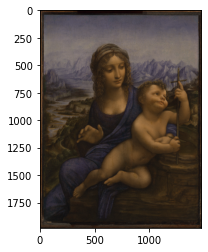

In [32]:
plt.imshow(img)

In [34]:
plt.imsave('../../Phantom/Leonardo_color_py_my.png', img )

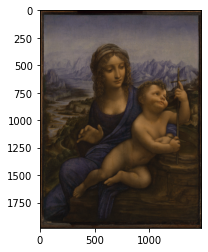

In [62]:
plt.imshow(.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


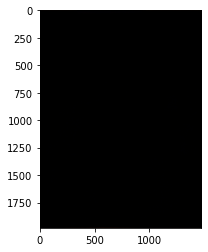

In [64]:
plt.imshow(img - data['color'])

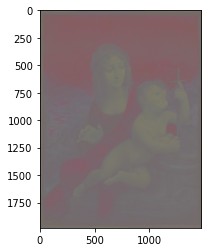

In [73]:
plt.imshow(minMaxScale((img * 255.0).astype(int) - data['color']))

In [74]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Apr  9 21:01:23 2015',
 '__version__': '1.0',
 '__globals__': [],
 'l': array([[[ 0,  0,  0, ...,  6, 34,  0],
         [ 0,  0,  0, ..., 13, 68,  0],
         [ 0,  0,  0, ..., 13, 53,  0],
         ...,
         [ 0,  0,  0, ...,  9, 54,  1],
         [ 0,  0,  0, ..., 18, 83,  1],
         [ 0,  0,  0, ..., 15, 52,  1]],
 
        [[ 0,  8,  0, ...,  7, 55,  0],
         [ 0,  2,  0, ..., 16, 55,  0],
         [ 0,  5,  0, ..., 20, 61,  0],
         ...,
         [ 0, 10,  0, ..., 18, 65,  0],
         [ 0,  8,  0, ..., 12, 88,  0],
         [ 0,  9,  0, ..., 17, 56,  0]],
 
        [[ 0,  8,  7, ...,  0, 58,  0],
         [ 2,  3,  1, ...,  0, 53,  0],
         [ 7,  6,  6, ...,  0, 29,  0],
         ...,
         [10,  9,  9, ...,  0, 68,  0],
         [11, 10,  9, ...,  0, 85,  0],
         [ 9,  9,  8, ...,  0, 32,  0]],
 
        ...,
 
        [[ 1,  1,  1, ..., 11,  0,  0],
         [ 1,  1,  1, ..., 14, 

In [83]:
import cv2
from glob import glob

In [91]:
len(layers)

32

In [104]:
img = cv2.imread('../../Phantom/26-11-2014-provino-bianco/TIF.8bit_norm.255/Ch00_VIS_00_n_8b.tif',cv2.IMREAD_GRAYSCALE)
layers = glob('../../Phantom/26-11-2014-provino-bianco/TIF.8bit_norm.255/*tif')[0:-1]
source_img = np.zeros((*img.shape,len(layers)))

for l in range(len(layers)):
    source_img[:,:,l] = cv2.imread(layers[l], cv2.IMREAD_UNCHANGED).data

In [105]:
source_img

array([[[  0.,   0.,   0., ..., 121., 122., 139.],
        [  0.,   0.,   0., ..., 125., 101., 140.],
        [  0.,   0.,   0., ..., 122., 127., 141.],
        ...,
        [  0.,   0.,   0., ..., 127.,  98., 138.],
        [  0.,   0.,   0., ..., 128., 112., 143.],
        [  0.,   0.,   0., ..., 133., 114., 144.]],

       [[109.,   0., 133., ..., 142., 135.,   0.],
        [183.,   0., 154., ..., 127., 140.,   0.],
        [163.,   0., 152., ..., 121., 127.,   0.],
        ...,
        [147.,   0., 134., ..., 130., 105.,   0.],
        [119.,   0., 134., ..., 123.,  92.,   0.],
        [100.,   0., 132., ..., 124.,  89.,   0.]],

       [[124., 139., 136., ...,   0., 116.,   0.],
        [ 98., 133., 148., ...,   0., 127.,   0.],
        [159., 141., 157., ...,   0., 118.,   0.],
        ...,
        [207., 124., 134., ...,   0., 121.,   0.],
        [ 80., 122., 133., ...,   0., 141.,   0.],
        [ 94., 119., 134., ...,   0., 114.,   0.]],

       ...,

       [[151., 138., 141

In [102]:
sio.savemat('provino-bianco.mat',{'image' : source_img} )



In [103]:
!pwd



'pwd' is not recognized as an internal or external command,
operable program or batch file.
